Text(0, 0.5, 'Energy $E_i$ (eigenvalues)')

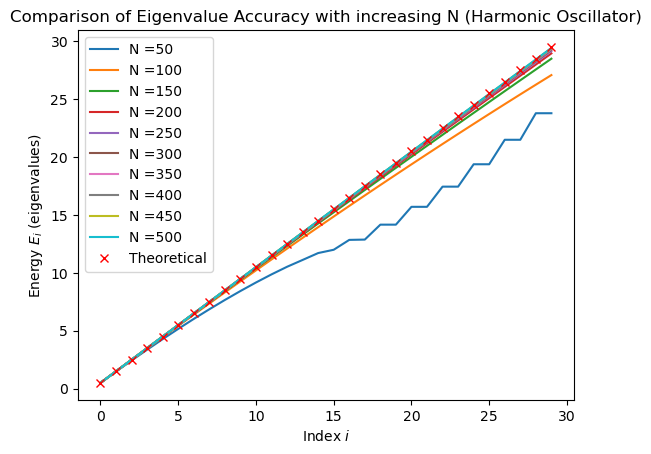

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def ham(x_pos, pot_array):
    
    N = len(x_pos)
    dx = x_pos[1] - x_pos[0]
    pot = np.diag(pot_array)
    kin = -((np.eye(N, N, k=+1) + np.eye(N, N, k=-1) - 2*np.eye(N, N, k=0))/(dx**2))/2
    ham_matrix = pot + kin
    return ham_matrix

N = np.arange(50, 550, 50)
omega = 1

for i in N:
    x_pos = np.linspace(-10, 10, i)
    harmonic_pot = 0.5*(omega**2)*(x_pos**2)
    ham_matrix = ham(x_pos, harmonic_pot)
    ho_eigvals, ho_eigvecs = np.linalg.eigh(ham_matrix)
    plt.plot(ho_eigvals[:30], label= 'N ='+str(i))
    
plt.plot(omega*(np.arange(30) + 0.5), "rx", label="Theoretical")
plt.legend()
plt.title("Comparison of Eigenvalue Accuracy with increasing N (Harmonic Oscillator)")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")

Text(0, 0.5, 'Energy $E_i$ (eigenvalues)')

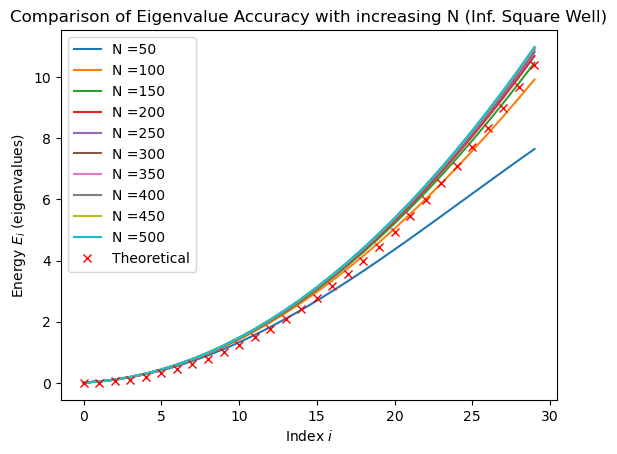

In [2]:
#Infinite Square Well
for i in N:
    x_pos = np.linspace(-10, 10, i)
    harmonic_pot = np.zeros(i)
    ham_matrix = ham(x_pos, harmonic_pot)
    ho_eigvals, ho_eigvecs = np.linalg.eigh(ham_matrix)
    plt.plot(ho_eigvals[:30], label= 'N ='+str(i))
    
plt.plot((np.arange(30)**2)*(np.pi**2)/(800), "rx", label="Theoretical")
plt.legend()
plt.title("Comparison of Eigenvalue Accuracy with increasing N (Inf. Square Well)")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energy $E_i$ (eigenvalues)")

Text(0, 0.5, 'Energy $E$')

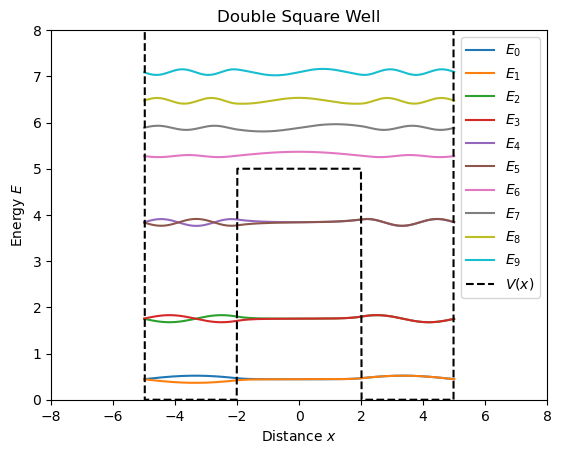

In [90]:
#Double Well
n = 500
V_o = 5
L = 10
x_pos = np.linspace(-L/2, L/2, n)
wall_width = 4
def doublesquare(V_o, x_pos, N, wall_width):
    v = np.zeros(N)
    for j in range(N):
        if -wall_width/2 <= x_pos[j] <= wall_width/2:
            v[j] = V_o
    return v
pot = doublesquare(V_o, x_pos, n, wall_width)
hamilton = ham(x_pos, pot)
eigvals, eigvecs= np.linalg.eigh(hamilton)
for i in range(10):
    plt.plot(x_pos, eigvals[i] + eigvecs[:,i], label = r"$E_{%s}$" %i)

pot[0] = pot[n-1] = 6769420
plt.plot(x_pos, pot, "k--", label = r"$V(x)$")
plt.legend()
plt.ylim(0, 8)
plt.xlim(-8, 8)
plt.title("Double Square Well")
plt.xlabel(r"Distance $x$")
plt.ylabel(r"Energy $E$")

Text(0, 0.5, 'Energies $E$')

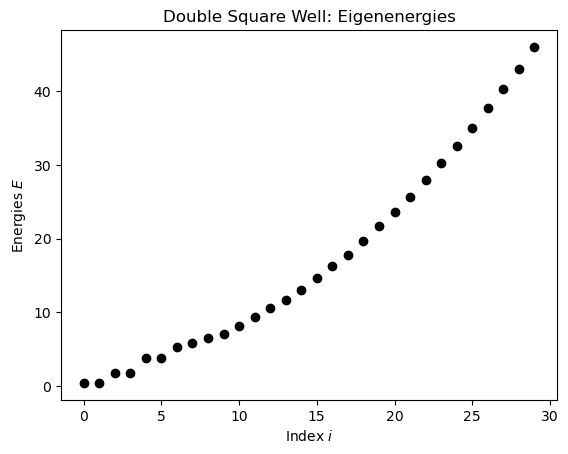

In [98]:
plt.plot(eigvals[:30], "ko")

plt.title("Double Square Well: Eigenenergies")
plt.xlabel(r"Index $i$")
plt.ylabel(r"Energies $E$")